In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [146]:
with open('/home/ahojel/visual_prompting_vid/output_dir/maevqgan_segmentation_1/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data = [eval(line.strip()) for line in data]

In [147]:
# Create a DataFrame
df = pd.DataFrame(data)

In [148]:
# df["coeff"] = df["coeff"].apply(lambda x: "False" if pd.isna(x) else x)
# df["convex"] = df["convex"].apply(lambda x: "False" if pd.isna(x) else x)
# df["tokens"] = df["tokens"].apply(lambda x: "False" if pd.isna(x) else x)

In [149]:
df

,query_name,support_name,baseline,task,metric,iou,accuracy,coeff,convex,tokens,r_metric,r_iou,r_accuracy
0,2007_000033,2010_003365,True,label_segmentation,1.298066,0.570652,0.923058,NaN,NaN,NaN,NaN,NaN,NaN
1,2007_000033,2010_003365,NaN,label_segmentation,8.772437,0.137022,0.487298,0.0,False,all,8.048229,0.110736,0.507913
2,2007_000033,2010_003365,NaN,label_segmentation,8.772437,0.137022,0.487298,0.0,False,top_half,8.048229,0.110736,0.507913
3,2007_000033,2010_003365,NaN,label_segmentation,8.772437,0.137022,0.487298,0.0,False,bottom_half,8.048229,0.110736,0.507913
4,2007_000033,2010_003365,NaN,label_segmentation,8.772437,0.137022,0.487298,0.0,False,left_half,8.048229,0.110736,0.507913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446433,2010_004529,2010_003781,NaN,label_segmentation,3.113133,0.267011,0.804156,2.8,False,except_top_right,2.728289,0.284054,0.819982
446434,2010_004529,2010_003781,NaN,label_segmentation,2.006463,0.652622,0.879555,2.8,False,except_bottom_right,2.060309,0.634611,0.875416
446435,2010_004529,2010_003781,NaN,label_segmentation,2.657776,0.472821,0.851230,2.9,False,except_top_left,2.362834,0.493786,0.864459
446436,2010_004529,2010_003781,NaN,label_segmentation,3.167443,0.275318,0.806022,2.9,False,except_top_right,2.783059,0.292848,0.821849


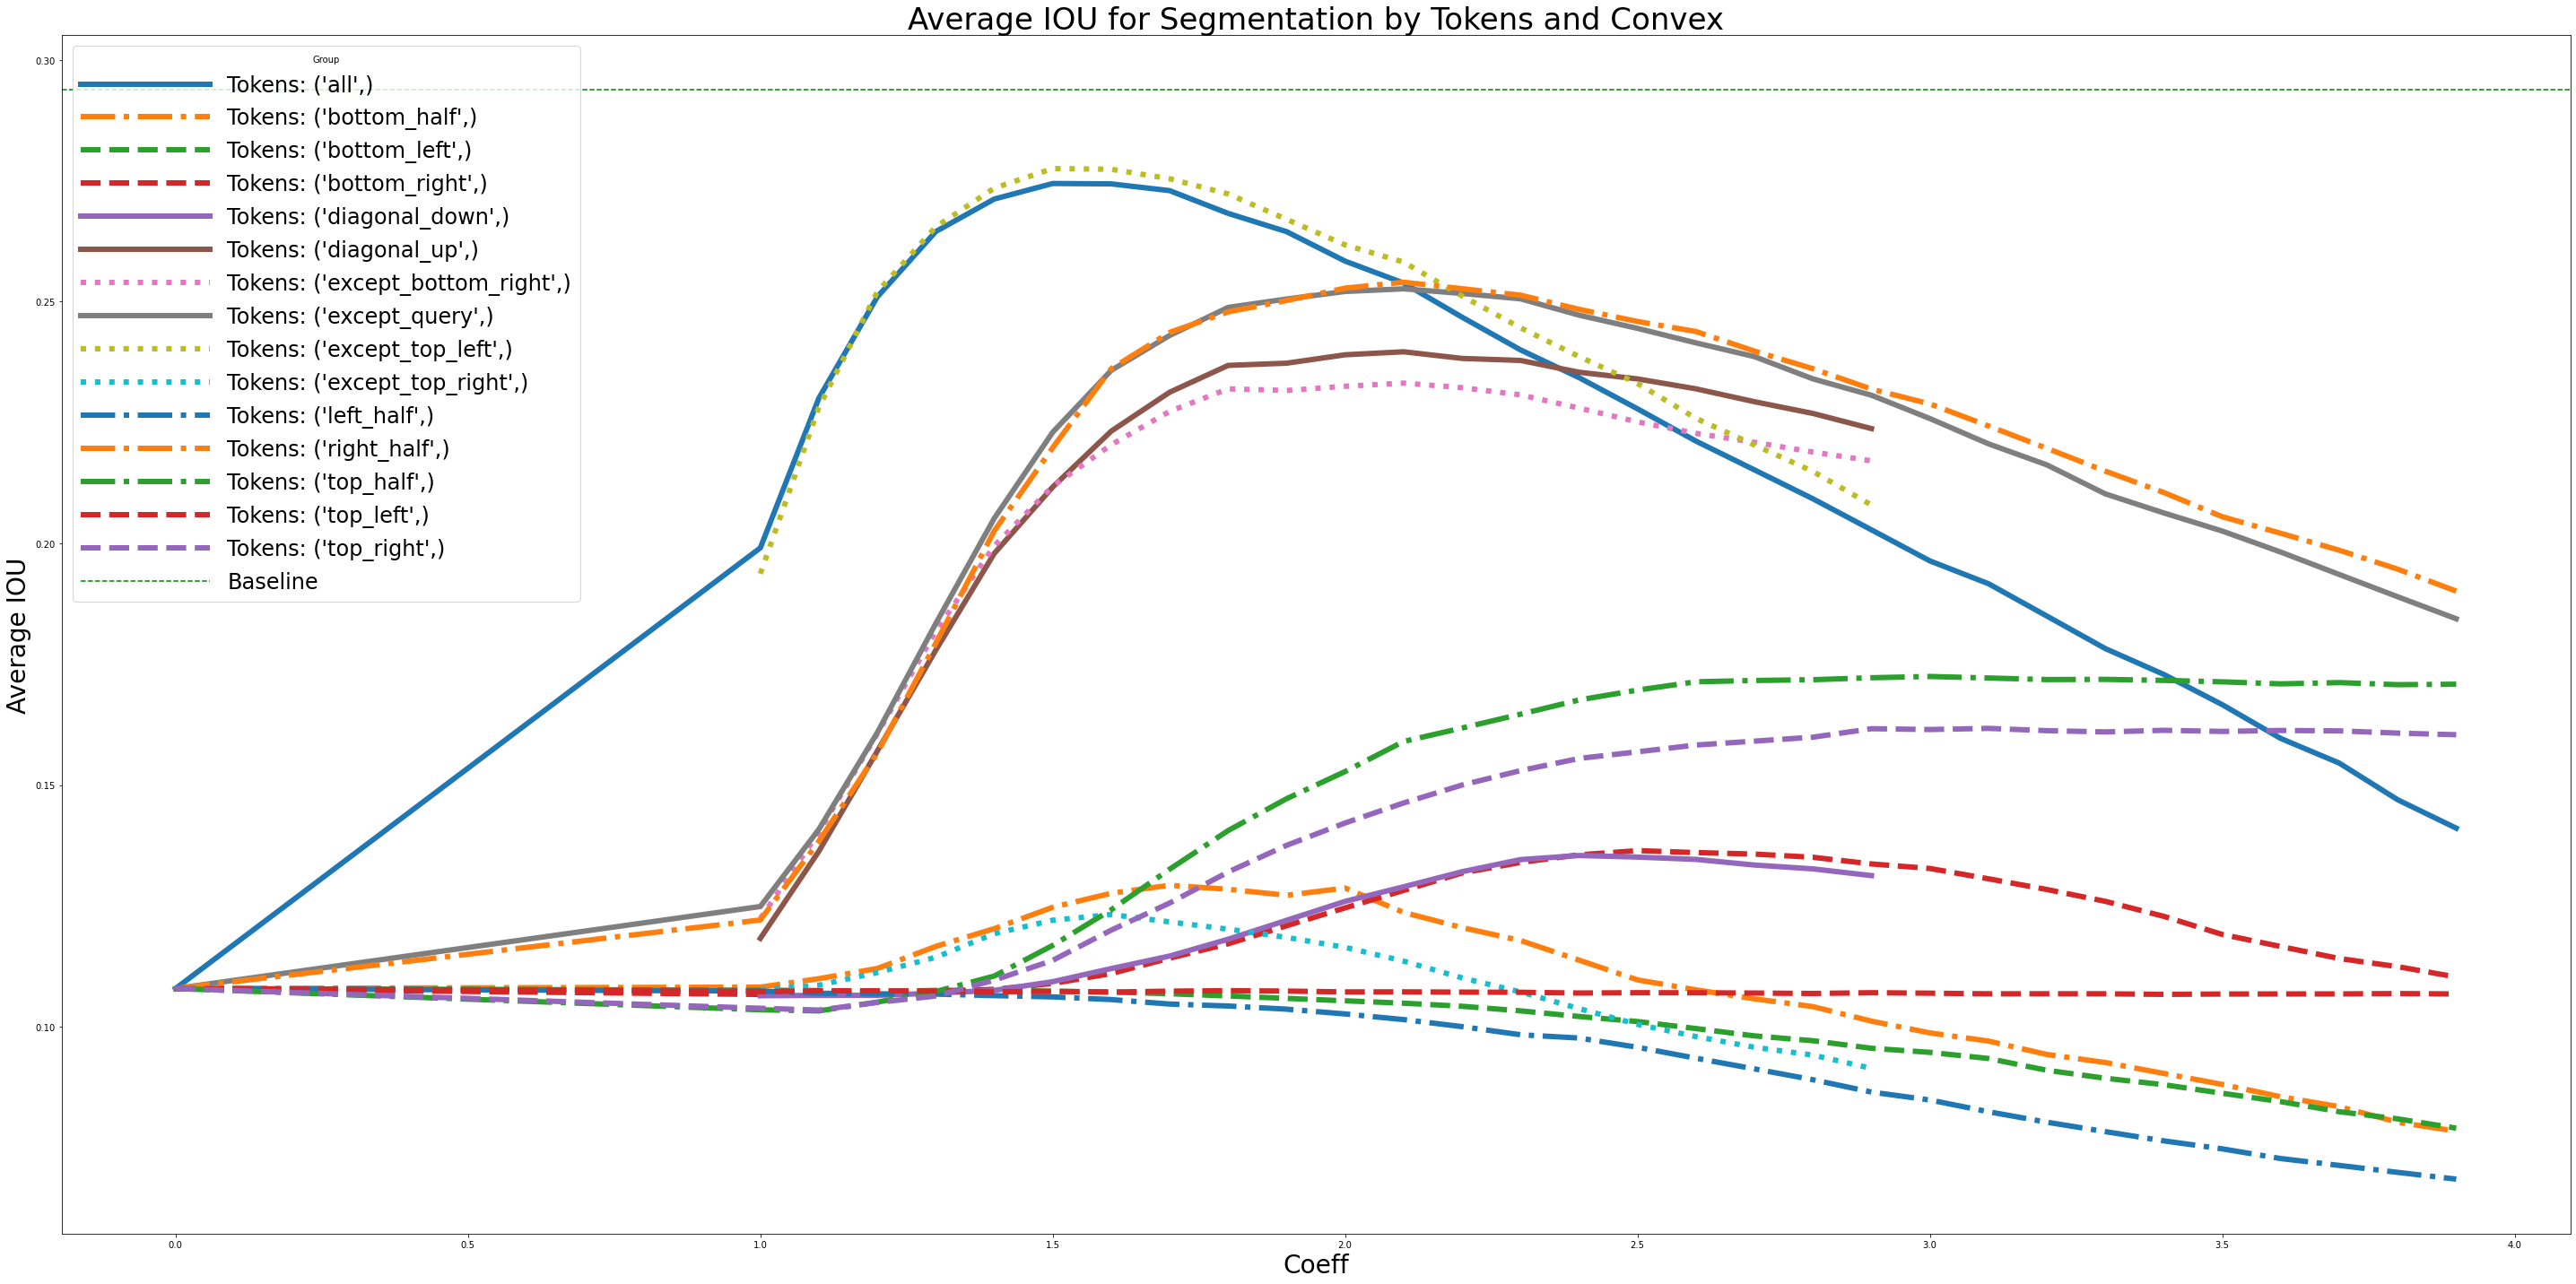

In [150]:
# Filter the dataframe for the task 'label_segmentation'
seg_df = df[df["task"] == "label_segmentation"]

# Calculate the baseline IOU
baseline = df[~df["baseline"].isna()]["iou"].mean()

# Filter out the baseline data
model_df = df[df["baseline"].isna()]

# Group by 'tokens' and 'coeff', then get the average 'iou' for each group
grouped_df = model_df.groupby(['tokens', 'coeff'])['iou'].mean().reset_index()

# Setting up the plot
fig, ax = plt.subplots(figsize=(40, 20))

# Plot each group with specific line style based on 'tokens' ending
for name, group in grouped_df.groupby(['tokens']):
    if name[0].endswith('right') or name[0].endswith('left'):
        if name[0].startswith('except'):
            linestyle = ':'
        else:
            linestyle = '--'
    elif name[0].endswith("half"):
        linestyle = '-.'
    elif name[0].startswith("diagonal"):
        linestyle = '-'
    else:
        linestyle = '-'
    ax.plot(np.array(group['coeff']), np.array(group['iou']), label=f'Tokens: {name}', linestyle=linestyle, linewidth=6.0)

# Plot the baseline as a horizontal line
ax.axhline(y=baseline, color='green', linestyle='--', label='Baseline')

# Set the title and labels for the plot
ax.set_title('Average IOU for Segmentation by Tokens and Convex', fontsize=34)
ax.set_xlabel('Coeff', fontsize=28)
ax.set_ylabel('Average IOU', fontsize=28)

# Display the legend
ax.legend(title='Group', fontsize=24, handlelength=6)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [40]:
grouped_df

,tokens,coeff,iou
0,all,0.0,0.109137
1,all,1.0,0.200992
2,all,1.1,0.228837
3,all,1.2,0.251958
4,all,1.3,0.265206
...,...,...,...
305,top_right,3.5,0.160699
306,top_right,3.6,0.160917
307,top_right,3.7,0.160905
308,top_right,3.8,0.160698


In [62]:
grouped_df_max = grouped_df.groupby(['tokens'])['iou'].max().reset_index()
grouped_df_max.columns = ['tokens', 'max_iou']
grouped_df_max = grouped_df_max.merge(grouped_df, how='left', left_on=['tokens', 'max_iou'], right_on=['tokens', 'iou'])
grouped_df_max = grouped_df_max.drop_duplicates(['tokens', 'max_iou'])
grouped_df_max = grouped_df_max.rename(columns={'coeff': 'coeff_at_max'})
grouped_df_max[["tokens", "max_iou", "coeff_at_max"]]

,tokens,max_iou,coeff_at_max
0,all,0.273779,1.5
1,bottom_half,0.130223,1.7
2,bottom_left,0.107839,0.0
3,bottom_right,0.136927,2.5
4,except_bottom_right,0.224984,2.4
5,except_query,0.251995,2.1
6,except_top_left,0.238076,1.4
7,except_top_right,0.116597,2.0
8,left_half,0.107839,0.0
9,right_half,0.253053,2.1


except_top_left
except_top_right
except_query
except_bottom_right


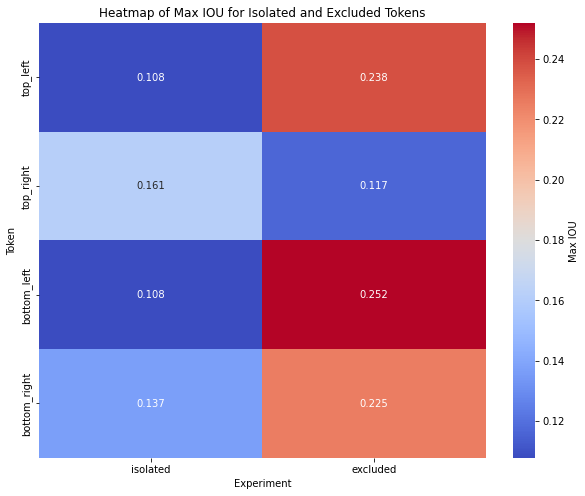

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for the heatmap
tokens = ['top_left', 'top_right', 'bottom_left', 'bottom_right']
experiments = ['isolated', 'excluded']

# Initialize an empty dataframe to store the heatmap data
heatmap_data = pd.DataFrame(index=tokens, columns=experiments)

# Populate the dataframe with max_iou values for 'isolated' and 'excluded' experiments
for token in tokens:
    isolated_value = grouped_df_max[grouped_df_max["tokens"] == token]["max_iou"].values[0]
    if token == "bottom_left":
        excluded_token = 'except_query'
    else:
        excluded_token = 'except_' + token
    print(excluded_token)
    excluded_value = grouped_df_max[grouped_df_max["tokens"] == excluded_token]["max_iou"].values[0]
    heatmap_data.at[token, 'isolated'] = isolated_value
    heatmap_data.at[token, 'excluded'] = excluded_value

# Convert the dataframe values to float for proper heatmap display
heatmap_data = heatmap_data.astype(float)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Max IOU'})
plt.title("Heatmap of Max IOU for Isolated and Excluded Tokens")
plt.ylabel("Token")
plt.xlabel("Experiment")
plt.show()


In [151]:
with open('/home/ahojel/visual_prompting_vid/output_dir/maevqgan_tokendrop/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data = [eval(line.strip()) for line in data]

df2 = pd.DataFrame(data)

In [152]:
df2

,query_name,support_name,baseline,task,metric,iou,accuracy,dropped_tokens,r_metric,r_iou,r_accuracy
0,2007_000033,2011_002515,True,label_segmentation,1.011990,0.646447,0.933772,NaN,NaN,NaN,NaN
1,2007_000033,2011_002515,True,label_segmentation,1.011990,0.646447,0.933772,NaN,NaN,NaN,NaN
2,2007_000033,2011_002515,True,label_segmentation,1.011990,0.646447,0.933772,NaN,NaN,NaN,NaN
3,2007_000033,2011_002515,True,label_segmentation,1.011990,0.646447,0.933772,NaN,NaN,NaN,NaN
4,2007_000033,2011_002515,True,label_segmentation,1.011990,0.646447,0.933772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2272,2008_004659,2009_003003,True,label_segmentation,2.483347,0.665658,0.856505,NaN,NaN,NaN,NaN
2273,2008_004659,2009_003003,NaN,label_segmentation,6.713195,0.354869,0.498336,top_half,6.753052,0.340471,0.477559
2274,2008_004659,2009_003003,NaN,label_segmentation,3.058946,0.640025,0.815762,top_left,1.947513,0.726852,0.865920
2275,2008_004659,2009_003003,NaN,label_segmentation,6.289332,0.316798,0.508157,top_right,6.416562,0.305919,0.491762


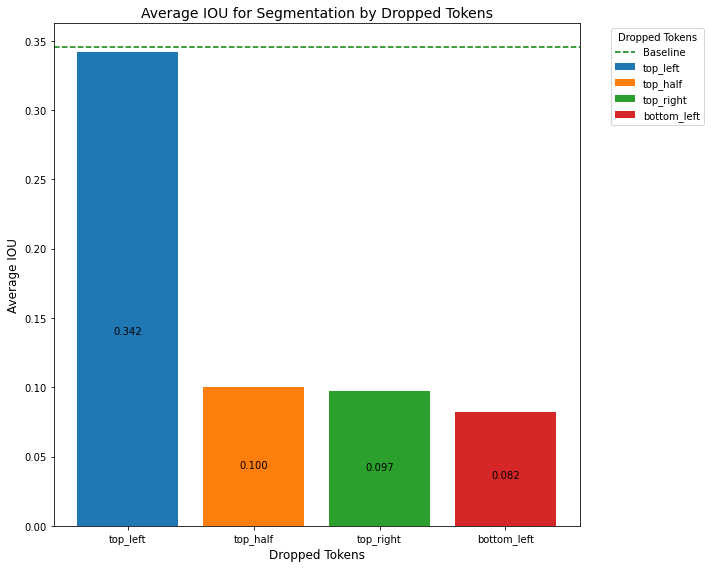

In [153]:
# Filter the dataframe for the task 'label_segmentation'
seg_df = df2[df2["task"] == "label_segmentation"]

# Calculate the baseline IOU
baseline_iou = df2[~df2["baseline"].isna()]["iou"].mean()

# Filter out the baseline data
model_df = df2[df2["baseline"].isna()]

# Group by 'dropped_tokens' and get the average 'iou' for each group
grouped_df = model_df.groupby("dropped_tokens")['iou'].mean().reset_index()

# Sort the grouped dataframe from biggest to smallest average IOU
grouped_df = grouped_df.sort_values('iou', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
# Plot the baseline as a horizontal line
plt.axhline(y=baseline_iou, color='green', linestyle='--', label='Baseline')

# Plot the average IOUs for each dropped-tokens category in descending order
for index, row in grouped_df.iterrows():
    plt.bar(row['dropped_tokens'], row['iou'], label=row['dropped_tokens'])

for rect in bar_plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height - rect.get_height() *0.6, f'{height:.3f}', ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Average IOU for Segmentation by Dropped Tokens', fontsize=14)
plt.xlabel('Dropped Tokens', fontsize=12)
plt.ylabel('Average IOU', fontsize=12)

# Display the legend
plt.legend(title='Dropped Tokens', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

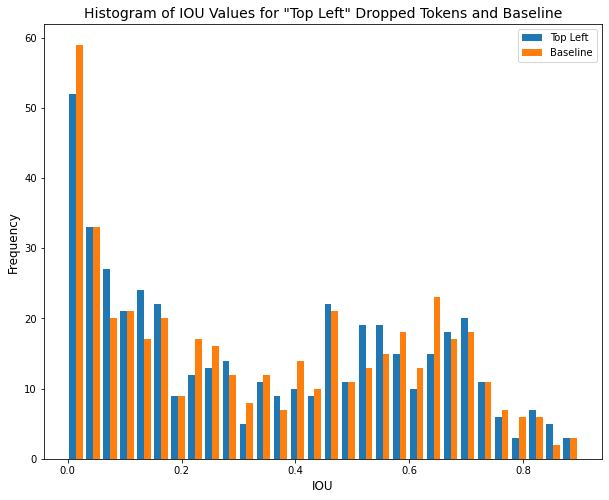

In [144]:
# Filter the dataframe for the task 'label_segmentation'
seg_df = df2[df2["task"] == "label_segmentation"]

# Calculate the baseline IOU
baseline_iou = df2[~df2["baseline"].isna()]["iou"].mean()

# Filter for 'top_left' dropped_tokens and baseline data
top_left_df = df2[(df2["dropped_tokens"] == "top_left") | (~df2["baseline"].isna())]

# Plotting
plt.figure(figsize=(10, 8))
# Plot the histogram of the IOU values for 'top_left' dropped_tokens and baseline
plt.hist([top_left_df[top_left_df["baseline"].isna()]["iou"], 
          top_left_df[~top_left_df["baseline"].isna()]["iou"]], 
         bins=30, label=['Top Left', 'Baseline'])

# Set the title and labels for the plot
plt.title('Histogram of IOU Values for "Top Left" Dropped Tokens and Baseline', fontsize=14)
plt.xlabel('IOU', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the legend
plt.legend()

# Display the plot
plt.show()


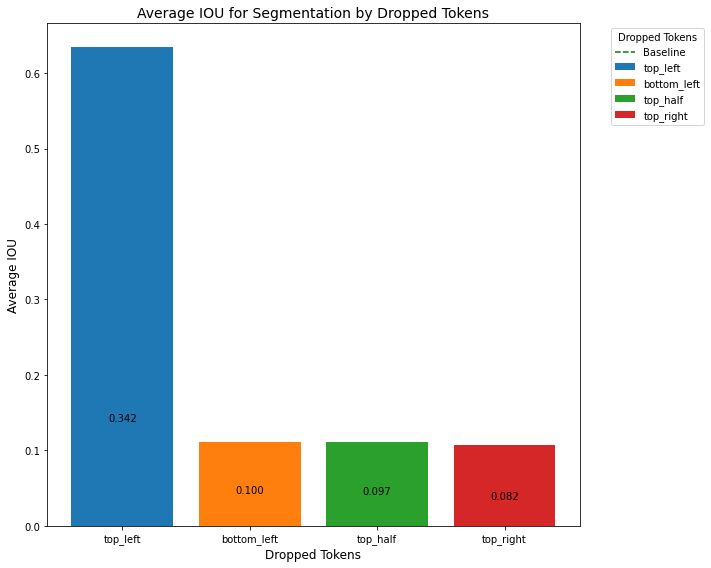

In [139]:
# Filter the dataframe for the task 'label_segmentation'
seg_df = df2[df2["task"] == "label_segmentation"]

# Calculate the baseline IOU
baseline_iou = df2[~df2["baseline"].isna()]["r_iou"].mean()

# Filter out the baseline data
model_df = df2[df2["baseline"].isna()]

# Group by 'dropped_tokens' and get the average 'iou' for each group
grouped_df = model_df.groupby("dropped_tokens")['r_iou'].mean().reset_index()

# Sort the grouped dataframe from biggest to smallest average IOU
grouped_df = grouped_df.sort_values('r_iou', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
# Plot the baseline as a horizontal line
plt.axhline(y=baseline_iou, color='green', linestyle='--', label='Baseline')

# Plot the average IOUs for each dropped-tokens category in descending order
for index, row in grouped_df.iterrows():
    plt.bar(row['dropped_tokens'], row['r_iou'], label=row['dropped_tokens'])

for rect in bar_plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height - rect.get_height() *0.6, f'{height:.3f}', ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Average IOU for Segmentation by Dropped Tokens', fontsize=14)
plt.xlabel('Dropped Tokens', fontsize=12)
plt.ylabel('Average IOU', fontsize=12)

# Display the legend
plt.legend(title='Dropped Tokens', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [24]:
df.groupby(['query_name', 'support_name']).size()


query_name   support_name
2007_000033  2010_003365     466
2007_000061  2008_002504     466
2007_000129  2009_002295     466
2007_000346  2009_002372     416
2007_000529  2008_001580     344
2007_000559  2007_001408     344
2007_000572  2009_000573     344
2007_000762  2007_005428     344
2007_001311  2007_005107     344
2007_001408  2010_001830     344
2007_001568  2010_003716     344
2007_001630  2007_007235     344
2007_001884  2010_001174     344
2007_002266  2007_007341     344
2007_002376  2008_007350     344
2007_002400  2009_003858     344
2007_002619  2007_002266     344
2007_002719  2009_003080     344
2007_003088  2008_007811     344
2007_003131  2007_000529     344
2007_003188  2008_006254     344
2007_003349  2007_008084     344
2007_003571  2007_003131     344
2007_003621  2010_006070     344
2007_003682  2010_005428     344
2007_003861  2010_002150     344
2007_004143  2009_001765     344
2007_004241  2007_002719     310
2007_004468  2010_000426     233
2007_005074  2007

In [38]:
df_grouped = df.groupby(["task", "layer", "lambda_1", "lambda_2", "text_coeff"])["metric"].mean().reset_index()

baseline = df_grouped[df_grouped["layer"]==False]
baseline_no_injection = df_grouped[(df_grouped["lambda_1"]==0)&(df_grouped["lambda_2"]==0)&(df_grouped["layer"]!=False)]
["layer", "lambda_1", "lambda_2", "text_coeff"]
unique_tasks = df_grouped['task'].unique()


<AxesSubplot:xlabel='layer'>

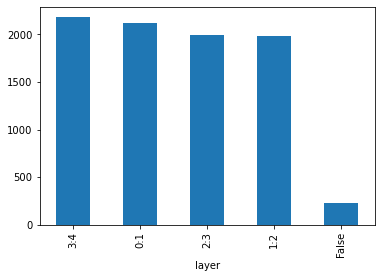

In [53]:
seg = df[df["task"]=="label_segmentation"]

seg[seg["iou"]>=0.3]


In [61]:
seg[(seg["lambda_1"]==0)&(seg["lambda_2"]==0)&(seg["layer"]!=False)]["metric"].mean()

4.1448205045868125

In [62]:
seg[seg["layer"]==False]["metric"].mean()

4.320399168549825

/tmp/ipykernel_1170696/3979189473.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  iou_baseline_no_injection = df_grouped_segmentation[(df_grouped_segmentation["lambda_1"]==0)&(df_grouped["lambda_2"]==0)&(df_grouped["layer"]!=False)]["iou"].mean()
/tmp/ipykernel_1170696/3979189473.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accuracy_baseline_no_injection = df_grouped_segmentation[(df_grouped_segmentation["lambda_1"]==0)&(df_grouped_segmentation["lambda_2"]==0)&(df_grouped["layer"]!=False)]["accuracy"].mean()


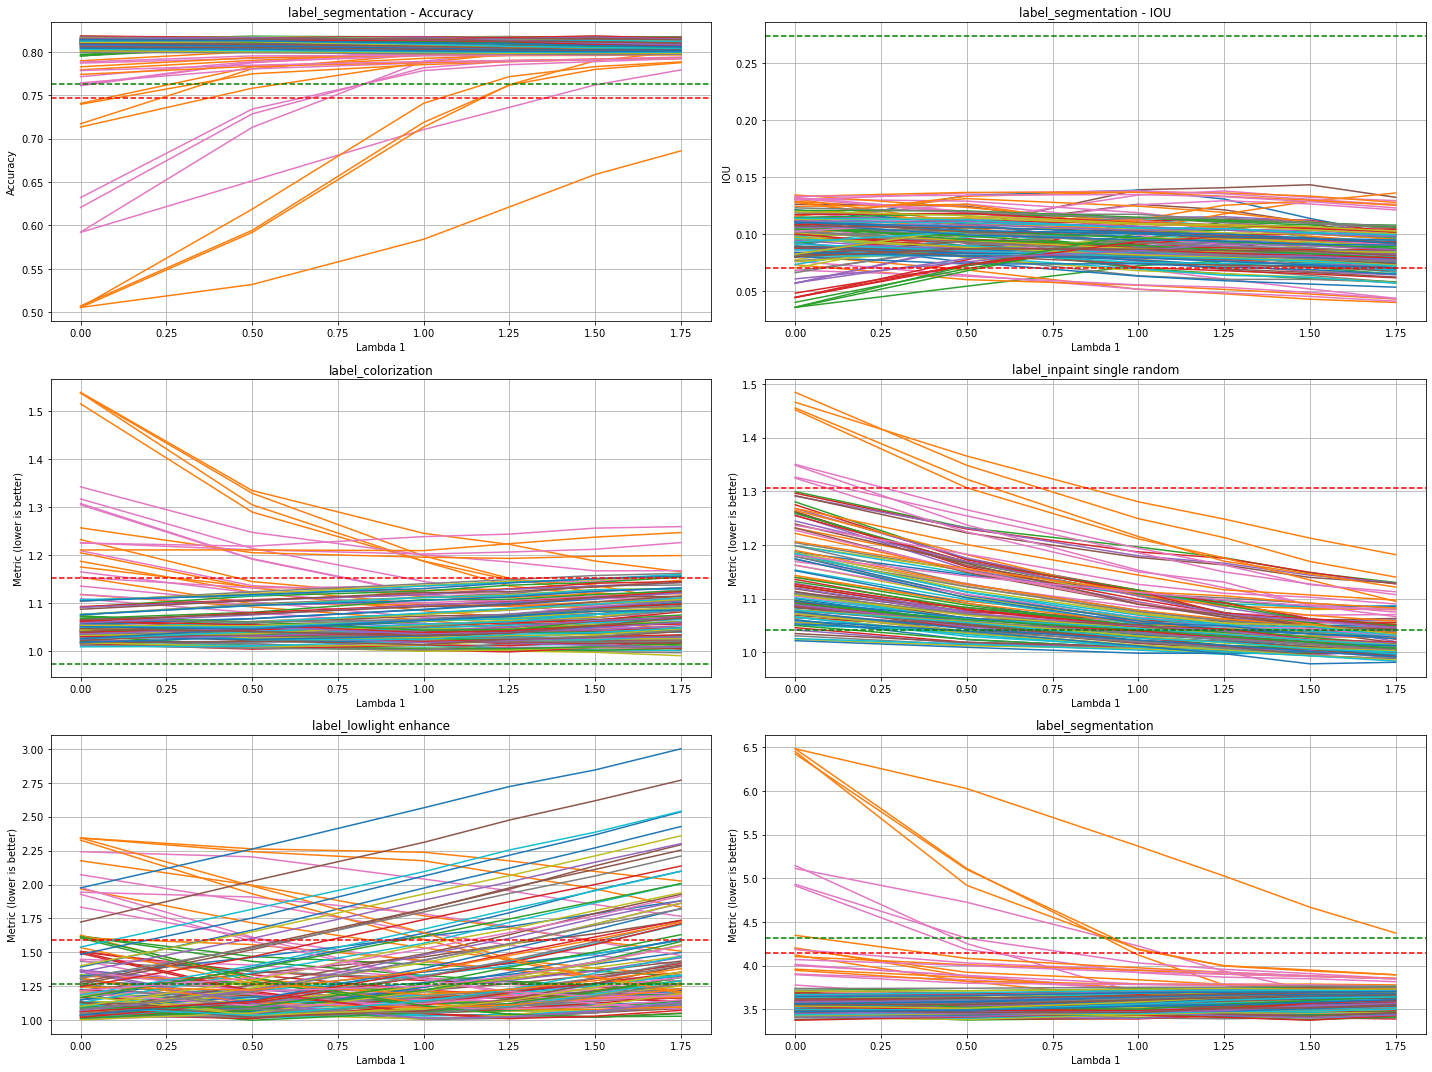

In [46]:
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 3
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    # Calculate the row and column index for the current subplot
    row = 1+ (i // num_cols)
    col = i % num_cols

    # Filter the dataframe for the current task and group by 'lambda' and 'vector'
    df_task = df_grouped[(df_grouped['task'] == task)]
    task_baseline = baseline[baseline['task'] == task]["metric"].mean()
    task_baseline_no_injection = baseline_no_injection[baseline_no_injection['task'] == task]["metric"].mean()

    # Plot each line for each combination of layer, lambda_2, and text_coeff
    for (layer, lambda_2, text_coeff), group in df_task.groupby(['layer', 'lambda_2', 'text_coeff']):
        label = f'Layer {layer}, Lambda 2: {lambda_2}, Text-Coeff: {text_coeff}'
        axes[row, col].plot(np.array(group['lambda_1']), np.array(group['metric']), label=label)

    # Plot the baseline
    axes[row, col].axhline(y=task_baseline, color='green', linestyle='--', label='Baseline')
    axes[row, col].axhline(y=task_baseline_no_injection, color='red', linestyle='--', label='No Injection')

    # Add a legend to the plot
    #axes[row, col].legend()
    axes[row, col].set_title(task)
    axes[row, col].set_xlabel('Lambda 1')
    axes[row, col].set_ylabel('Metric (lower is better)')
    axes[row, col].grid(True)

    # If the task is 'label_segmentation', plot 'iou' and 'accuracy' values
    if task == 'label_segmentation':
        ungrouped_df_task = df[df["task"]==task]
        df_grouped_segmentation = ungrouped_df_task.groupby(["layer", "lambda_1", "lambda_2", "text_coeff"])[["accuracy","iou"]].mean().reset_index()

        # Calculate the baseline for 'iou' and 'accuracy'
        iou_baseline = df_grouped_segmentation[df_grouped_segmentation["layer"]==False]["iou"].mean()
        accuracy_baseline = df_grouped_segmentation[df_grouped_segmentation["layer"]==False]["accuracy"].mean()
        
        iou_baseline_no_injection = df_grouped_segmentation[(df_grouped_segmentation["lambda_1"]==0)&(df_grouped["lambda_2"]==0)&(df_grouped["layer"]!=False)]["iou"].mean()
        accuracy_baseline_no_injection = df_grouped_segmentation[(df_grouped_segmentation["lambda_1"]==0)&(df_grouped_segmentation["lambda_2"]==0)&(df_grouped["layer"]!=False)]["accuracy"].mean()


        # Plot 'iou' values
        for (layer, lambda_2, text_coeff), group in df_grouped_segmentation.groupby(['layer', 'lambda_2', 'text_coeff']):
            label = f'Layer {layer}, Lambda 2: {lambda_2}, Text-Coeff: {text_coeff}'
            axes[0, 1].plot(np.array(group['lambda_1']), np.array(group['iou']), label=label)
            
        axes[0, 1].axhline(y=iou_baseline, color='green', linestyle='--', label='IOU Baseline')
        axes[0, 1].axhline(y=iou_baseline_no_injection, color='red', linestyle='--', label='No Injection')
        axes[0, 1].set_title(f'{task} - IOU')
        axes[0, 1].set_xlabel('Lambda 1')
        axes[0, 1].set_ylabel('IOU')
        axes[0, 1].grid(True)

        for (layer, lambda_2, text_coeff), group in df_grouped_segmentation.groupby(['layer', 'lambda_2', 'text_coeff']):
            label = f'Layer {layer}, Lambda 2: {lambda_2}, Text-Coeff: {text_coeff}'
            axes[0, 0].plot(np.array(group['lambda_1']), np.array(group['accuracy']), label=label)

        axes[0, 0].axhline(y=accuracy_baseline, color='green', linestyle='--', label='Accuracy Baseline')
        axes[0, 0].axhline(y=accuracy_baseline_no_injection, color='red', linestyle='--', label='No Injection')
        axes[0, 0].set_title(f'{task} - Accuracy')
        axes[0, 0].set_xlabel('Lambda 1')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
top_combinations_all_tasks = []
for task in df['task'].unique():
    top_combinations = df[df['task'] == task].groupby(['layer', 'lambda_1', 'lambda_2', 'text_coeff'])['metric'].mean().nsmallest(30).reset_index()
    top_combinations_all_tasks.append(set(top_combinations.set_index(['layer', 'lambda_1', 'lambda_2', 'text_coeff']).index))
common_top_combinations = set.intersection(*top_combinations_all_tasks)

# Group by 'lambda_1', 'lambda_2', 'layer', 'text_coeff' and calculate the mean for each group
grouped_data = df_task.groupby(['lambda_1', 'lambda_2', 'layer', "text_coeff"])[['iou', 'accuracy']].mean().reset_index()

# Filter the grouped data to only include the common top combinations
grouped_data = grouped_data[grouped_data.set_index(['layer', 'lambda_1', 'lambda_2', 'text_coeff']).index.isin(common_top_combinations)]


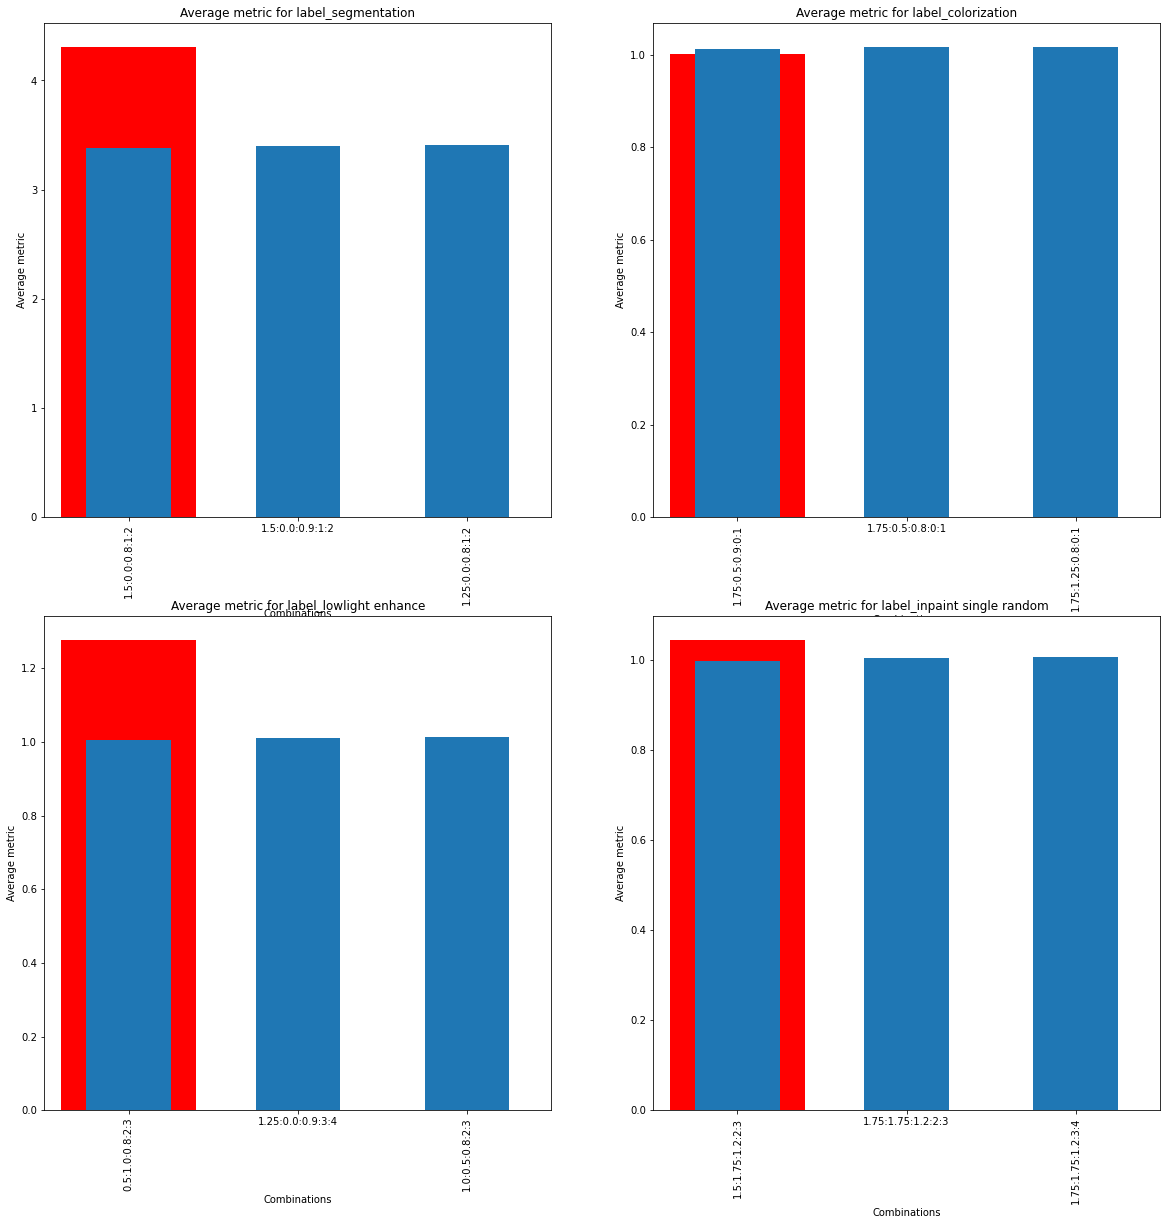

In [14]:
unique_tasks = df['task'].unique()
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i, task in enumerate(unique_tasks):
    row = i // num_cols
    col = i % num_cols

    df_task = df[df['task'] == task]
    df_baseline = df_task[(df_task['lambda_1'] == False) & (df_task['lambda_2'] == False) & (df_task['text_coeff'] == False) & (df_task['layer'] == False)]
    baseline_metric = df_baseline['metric'].mean()
    df_task = df_task[df_task['lambda_1'] != False]

    df_task['combination'] = df_task['lambda_1'].astype(str) + ':' + df_task['lambda_2'].astype(str) + ':' + df_task['text_coeff'].astype(str) + ':' + df_task['layer'].astype(str)
    df_combination = df_task.groupby('combination')['metric'].mean().sort_values().head(3)

    axes[row, col].bar('baseline', baseline_metric, color='r')
    df_combination.plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title('Average metric for ' + task)
    axes[row, col].set_ylabel('Average metric')
    axes[row, col].set_xlabel('Combinations')

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


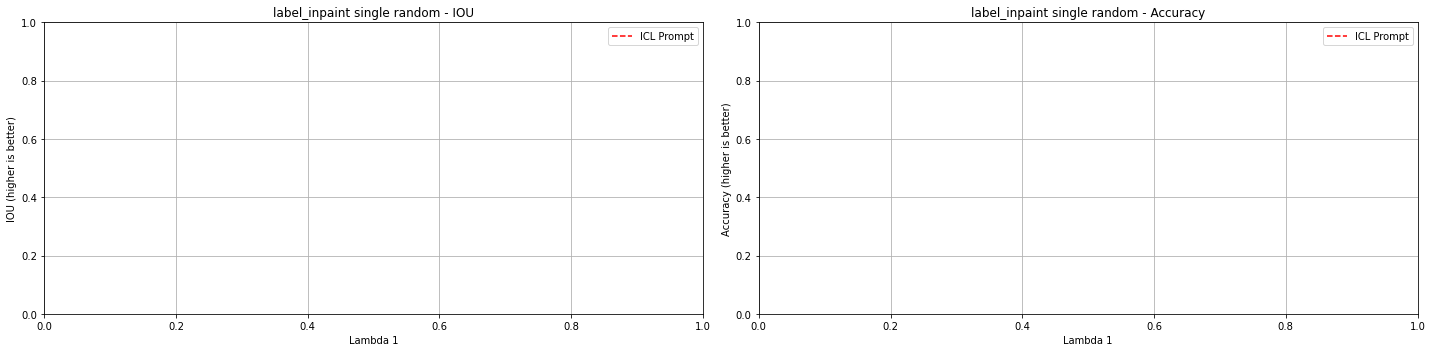

In [34]:
# Set the task to 'label_segmentation'
task = 'label_segmentation'

# Setting up the grid for plotting - only one row and two columns
num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))

# Filter the dataframe for the current task
df_task = df[df['task'] == task]

# Find the common top combinations across all tasks
top_combinations_all_tasks = []
for task in df['task'].unique():
    top_combinations = df[df['task'] == task].groupby(['layer', 'lambda_1', 'lambda_2', 'text_coeff'])['metric'].mean().nsmallest(30).reset_index()
    top_combinations_all_tasks.append(set(top_combinations.set_index(['layer', 'lambda_1', 'lambda_2', 'text_coeff']).index))
common_top_combinations = set.intersection(*top_combinations_all_tasks)

# Group by 'lambda_1', 'lambda_2', 'layer', 'text_coeff' and calculate the mean for each group
grouped_data = df_task.groupby(['lambda_1', 'lambda_2', 'layer', "text_coeff"])[['iou', 'accuracy']].mean().reset_index()

# Filter the grouped data to only include the common top combinations
grouped_data = grouped_data[grouped_data.set_index(['layer', 'lambda_1', 'lambda_2', 'text_coeff']).index.isin(common_top_combinations)]

# Plot one line for each of the common top combinations for 'iou'
for (layer, lambda_1, lambda_2, text_coeff), group in grouped_data.groupby(['layer', 'lambda_1', 'lambda_2', "text_coeff"]):
    label = f'Layer {layer}, Lambda 1: {lambda_1}, Lambda 2: {lambda_2}, Text-Coeff: {text_coeff}'
    axes[0].plot(np.array(group['lambda_1']), np.array(group['iou']), label=label)

# Add a legend to the plot
axes[0].legend(loc=0)
baseline_iou = df_task[df_task['lambda_1'].isna()]["iou"].mean()
axes[0].axhline(y=baseline_iou, color='red', linestyle='--', label='ICL Prompt')

axes[0].set_title(task + ' - IOU')
axes[0].set_xlabel('Lambda 1')
axes[0].set_ylabel('IOU (higher is better)')
axes[0].legend()
axes[0].grid(True)

# Plot one line for each of the common top combinations for 'accuracy'
for (layer, lambda_1, lambda_2, text_coeff), group in grouped_data.groupby(['layer', 'lambda_1', 'lambda_2', "text_coeff"]):
    label = f'Layer {layer}, Lambda 1: {lambda_1}, Lambda 2: {lambda_2}, Text-Coeff: {text_coeff}'
    axes[1].plot(np.array(group['lambda_1']), np.array(group['accuracy']), label=label)

# Add a legend to the plot
axes[1].legend(loc=0)
baseline_accuracy = df_task[df_task['lambda_1'].isna()]["accuracy"].mean()
axes[1].axhline(y=baseline_accuracy, color='red', linestyle='--', label='ICL Prompt')

axes[1].set_title(task + ' - Accuracy')
axes[1].set_xlabel('Lambda 1')
axes[1].set_ylabel('Accuracy (higher is better)')
axes[1].legend()
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Min metric for task label_segmentation: 3.646651463419588
Min metric for task label_colorization: 1.0041660275547564
Min metric for task label_lowlight enhance: 1.1103898634248344
Min metric for task label_inpaint single random: 0.9643625343437623


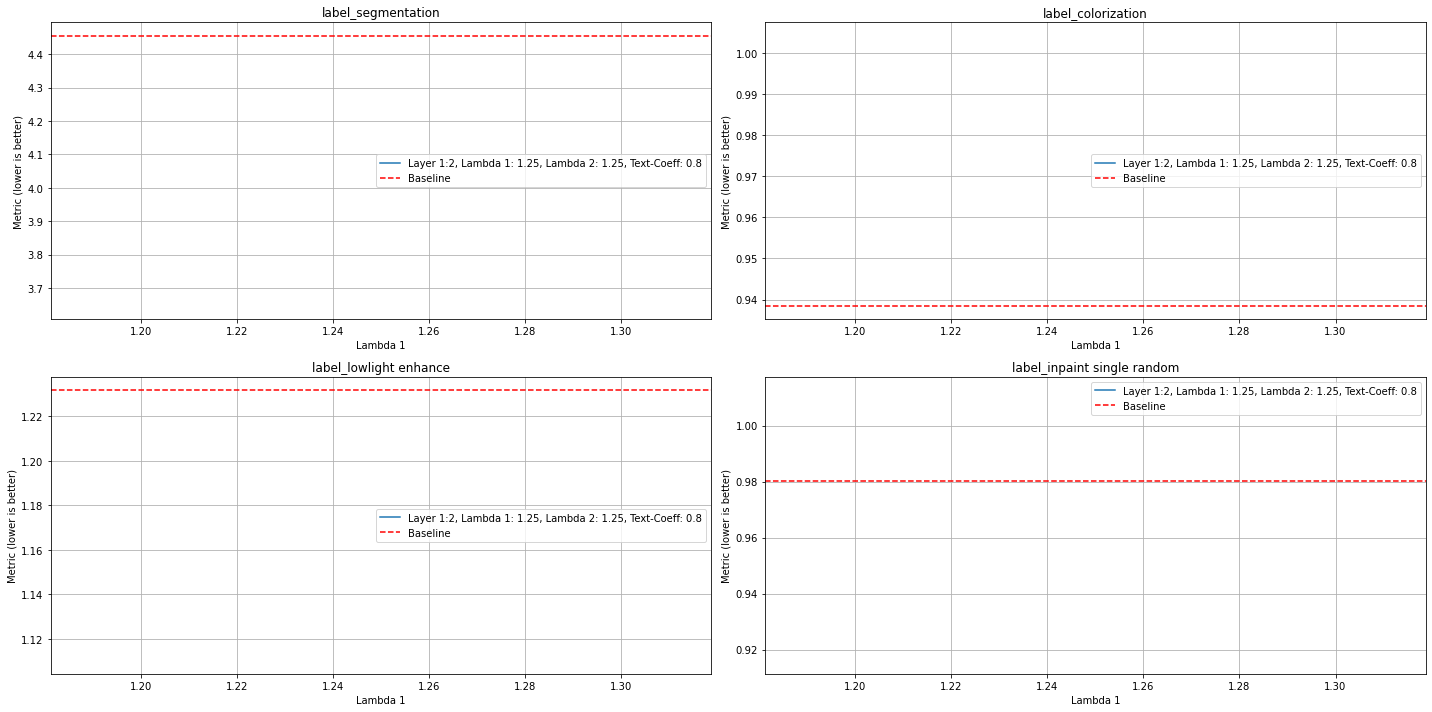

In [46]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Find the 10 combinations with the lowest overall mean metric across all tasks

# Iterating over each task and creating a subplot
top_combinations_all_tasks = []
for i, task in enumerate(unique_tasks):
    # Calculate the row and column index for the current subplot

    row = i // num_cols
    col = i % num_cols

    # Filter the dataframe for the current task
    df_task = df[df['task'] == task]

    top_combinations = df_task.groupby(['layer', 'lambda_1', 'lambda_2', 'text_coeff'])['metric'].mean().nsmallest(45).reset_index()
    top_combinations_all_tasks.append(set(top_combinations.set_index(['layer', 'lambda_1', 'lambda_2', 'text_coeff']).index))

# Get the intersection of top combinations across all tasks
common_top_combinations = set.intersection(*top_combinations_all_tasks)

for i, task in enumerate(unique_tasks):
    row = i // num_cols
    col = i % num_cols
    df_task = df[df['task'] == task]

    # Calculate the baseline
    baseline = df_task[df_task['layer'] == False]["metric"].mean()

    # Group by 'lambda_1', 'lambda_2', 'layer', 'text_coeff' and calculate the mean metric
    grouped_data = df_task.groupby(['lambda_1', 'lambda_2', 'layer', 'text_coeff'])['metric'].mean().reset_index()

    # Filter the grouped data to only include the common top combinations
    grouped_data = grouped_data[grouped_data.set_index(['layer', 'lambda_1', 'lambda_2', 'text_coeff']).index.isin(common_top_combinations)]

    # Plot one line for each of the common top combinations
    for (layer, lambda_1, lambda_2, text_coeff), group in grouped_data.groupby(['layer', 'lambda_1', 'lambda_2', 'text_coeff']):
        label = f'Layer {layer}, Lambda 1: {lambda_1}, Lambda 2: {lambda_2}, Text-Coeff: {text_coeff}'
        axes[row, col].plot(np.array(group['lambda_1']), np.array(group['metric']), label=label)

    # Plot the baseline
    axes[row, col].axhline(y=baseline, color='red', linestyle='--', label='Baseline')

    # Add a legend to the plot
    axes[row, col].legend()
    axes[row, col].set_title(task)
    axes[row, col].set_xlabel('Lambda 1')
    axes[row, col].set_ylabel('Metric (lower is better)')
    axes[row, col].grid(True)

    # Print the min metric of each task from the top combinations
    min_metric = grouped_data['metric'].min()
    print(f'Min metric for task {task}: {min_metric}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [126]:
df_grouped = df.groupby(["task", "layer", "lambda_1", "lambda_2", "text_coeff"])["metric"].mean().reset_index()

baseline = df_grouped[df_grouped["layer"]==False]
baseline_no_injection = df_grouped[(df_grouped["lambda_1"]==0)&(df_grouped["lambda_2"]==0)&(df_grouped["layer"]!=False)&(df_grouped["text_coeff"]==0)]
unique_tasks = df_grouped['task'].unique()

In [127]:
baseline_no_injection

,task,layer,lambda_1,lambda_2,text_coeff,metric
1,label_colorization,0:1,0.0,0.0,0.0,1.478482
181,label_colorization,1:2,0.0,0.0,0.0,1.481327
361,label_colorization,2:3,0.0,0.0,0.0,1.474712
541,label_colorization,3:4,0.0,0.0,0.0,1.487471
722,label_inpaint single random,0:1,0.0,0.0,0.0,1.381940
902,label_inpaint single random,1:2,0.0,0.0,0.0,1.389709
1082,label_inpaint single random,2:3,0.0,0.0,0.0,1.397282
1262,label_inpaint single random,3:4,0.0,0.0,0.0,1.386623
1443,label_lowlight enhance,0:1,0.0,0.0,0.0,2.242423
1623,label_lowlight enhance,1:2,0.0,0.0,0.0,2.241582


In [121]:
baseline

,task,layer,lambda_1,lambda_2,text_coeff,metric
0,label_colorization,False,0.0,0.0,0.0,0.935510
721,label_inpaint single random,False,0.0,0.0,0.0,0.983963
1442,label_lowlight enhance,False,0.0,0.0,0.0,1.203543
2163,label_segmentation,False,0.0,0.0,0.0,4.100802


In [119]:
df_grouped

,task,layer,lambda_1,lambda_2,text_coeff,metric
0,label_colorization,False,0.00,0.00,0.0,0.935510
1,label_colorization,0:1,0.00,0.00,0.0,1.478482
2,label_colorization,0:1,0.00,0.00,0.8,1.017790
3,label_colorization,0:1,0.00,0.00,0.9,1.008974
4,label_colorization,0:1,0.00,0.00,1.0,1.004734
...,...,...,...,...,...,...
2879,label_segmentation,3:4,1.75,1.75,0.0,3.843362
2880,label_segmentation,3:4,1.75,1.75,0.8,3.761708
2881,label_segmentation,3:4,1.75,1.75,0.9,3.746430
2882,label_segmentation,3:4,1.75,1.75,1.0,3.727701


Best metric for task label_segmentation: 3.407650336796106
Best metric for task label_colorization: 0.952046166532095
Best metric for task label_lowlight enhance: 0.9806972692079691
Best metric for task label_inpaint single random: 0.9230554713553413


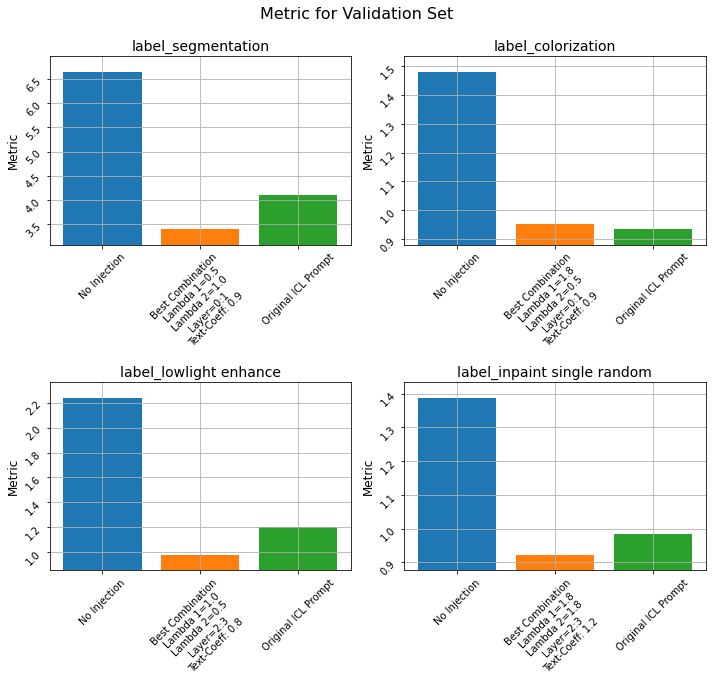

In [129]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))  # Adjusted for more space

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    row = i // num_cols
    col = i % num_cols
    df_task = df_grouped[df_grouped['task'] == task]
    df_task = df_task[df_task["layer"]!=False]

    # Calculate the baseline and lambda zero metrics using the new variables
    baseline_metric = baseline[baseline['task'] == task]["metric"].mean()
    no_injection_baseline_metric = baseline_no_injection[baseline_no_injection['task'] == task]["metric"].mean()
    
    # Find the best combination of lambda_1, lambda_2, layer, and text_coeff
    best_combination_index = df_task['metric'].idxmin()
    best_lambda_1 = df_task.loc[best_combination_index, 'lambda_1']
    best_lambda_2 = df_task.loc[best_combination_index, 'lambda_2']
    best_layer = df_task.loc[best_combination_index, 'layer']
    best_text_coeff = df_task.loc[best_combination_index, 'text_coeff']
    best_metric = df_task.loc[best_combination_index, 'metric']

    # Set up the bar labels and values
    bar_labels = ['No Injection', f'Best Combination\nLambda 1={best_lambda_1:.1f}\nLambda 2={best_lambda_2:.1f}\nLayer={best_layer}\nText-Coeff: {best_text_coeff}', 'Original ICL Prompt']
    bar_values = [no_injection_baseline_metric, best_metric, baseline_metric]
    axes[row, col].bar(bar_labels, bar_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Example colors

    # Configure the subplot
    axes[row, col].set_title(task, fontsize=14)
    axes[row, col].set_ylabel('Metric', fontsize=12)
    axes[row, col].grid(True)
    axes[row, col].tick_params(labelrotation=45, labelsize=10)
    axes[row, col].set_ylim([min(bar_values)-0.1*(max(bar_values) - min(bar_values)), max(bar_values)+0.1*(max(bar_values) - min(bar_values))])

    # Print the best metric value
    print(f'Best metric for task {task}: {best_metric}')

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Metric for Validation Set", fontsize=16)
plt.show()


Best metric for task label_segmentation: 3.407650336796106
Best iou for task label_segmentation: 0.16552667601677293
Best accuracy for task label_segmentation: 0.815950870650989


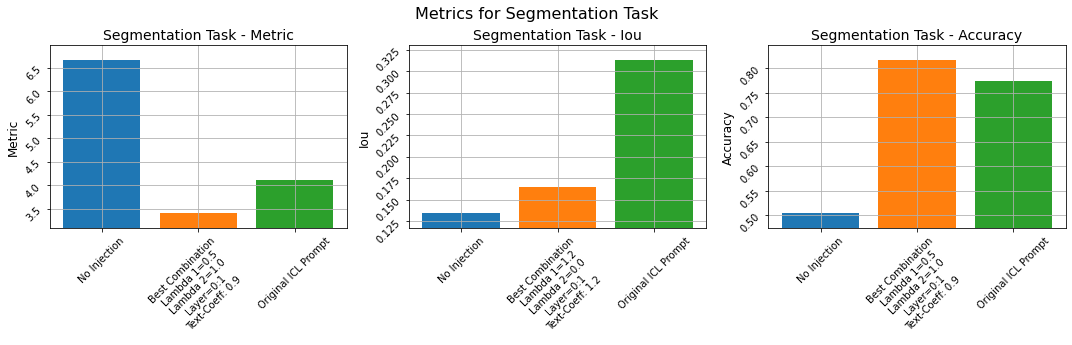

In [132]:
df_task = df[df['task'] == "label_segmentation"]
df_grouped = df_task.groupby(["task", "layer", "lambda_1", "lambda_2", "text_coeff"])[["metric", "iou","accuracy"]].mean().reset_index()

baseline = df_grouped[df_grouped["layer"]==False]
baseline_no_injection = df_grouped[(df_grouped["lambda_1"]==0)&(df_grouped["lambda_2"]==0)&(df_grouped["layer"]!=False)&(df_grouped["text_coeff"]==0)]

df_task = df_grouped[df_grouped["layer"]!=False]

# Setting up the grid for plotting - assuming there are 3 metrics to plot
num_rows = 1
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))  # Adjusted for more space

# Iterating over each metric and creating a subplot
for i, metric in enumerate(["metric", "iou", "accuracy"]):
    # Calculate the baseline and lambda zero metrics using the new variables
    baseline_metric = baseline[metric].mean()
    no_injection_baseline_metric = baseline_no_injection[metric].mean()
    
    # Find the best combination of lambda_1, lambda_2, layer, and text_coeff
    if i == 0:
        best_combination_index = df_task[metric].idxmin()
    else:
        best_combination_index = df_task[metric].idxmax()
    best_lambda_1 = df_task.loc[best_combination_index, 'lambda_1']
    best_lambda_2 = df_task.loc[best_combination_index, 'lambda_2']
    best_layer = df_task.loc[best_combination_index, 'layer']
    best_text_coeff = df_task.loc[best_combination_index, 'text_coeff']
    best_metric = df_task.loc[best_combination_index, metric]

    # Set up the bar labels and values
    bar_labels = ['No Injection', f'Best Combination\nLambda 1={best_lambda_1:.1f}\nLambda 2={best_lambda_2:.1f}\nLayer={best_layer}\nText-Coeff: {best_text_coeff}', 'Original ICL Prompt']
    bar_values = [no_injection_baseline_metric, best_metric, baseline_metric]
    axes[i].bar(bar_labels, bar_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Example colors

    # Configure the subplot
    axes[i].set_title(f'Segmentation Task - {metric.capitalize()}', fontsize=14)
    axes[i].set_ylabel(metric.capitalize(), fontsize=12)
    axes[i].grid(True)
    axes[i].tick_params(labelrotation=45, labelsize=10)
    axes[i].set_ylim([min(bar_values)-0.1*(max(bar_values) - min(bar_values)), max(bar_values)+0.1*(max(bar_values) - min(bar_values))])

    # Print the best metric value
    print(f'Best {metric} for task label_segmentation: {best_metric}')

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Metrics for Segmentation Task", fontsize=16)
plt.show()


Best lambda layer metric for task label_segmentation: 3.337957760295049
Best lambda layer metric for task label_colorization: 1.0207714874712759
Best lambda layer metric for task label_lowlight enhance: 1.059948938650116
Best lambda layer metric for task label_inpaint single random: 0.9797607568748373


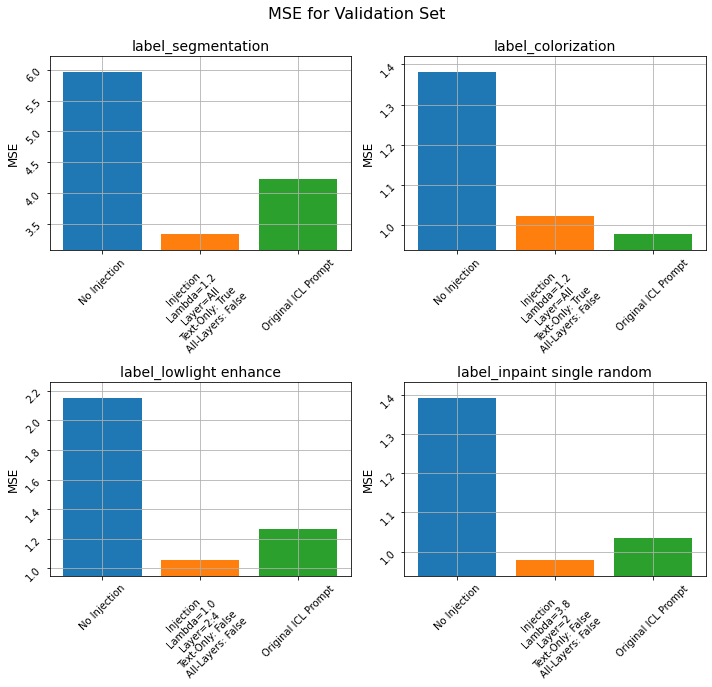

In [126]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))  # Adjusted for more space

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    row = i // num_cols
    col = i % num_cols
    df_task = df[df['task'] == task]
    grouped_data = df_task.groupby(['lambda', 'layer', 'text_only', 'all_layers'])[['metric',"r_metric"]].mean().reset_index()

    lambda_zero_metric = grouped_data[grouped_data['lambda'] == 0]['metric'].mean()
    baseline_metric = df_task[df_task['lambda'].isna()]["metric"].mean()
    best_lambda_layer_index = grouped_data['metric'].idxmin()
    best_lambda = grouped_data.loc[best_lambda_layer_index, 'lambda']
    best_layer = grouped_data.loc[best_lambda_layer_index, 'layer']
    best_text_only = grouped_data.loc[best_lambda_layer_index, 'text_only']
    best_all_layers = grouped_data.loc[best_lambda_layer_index, 'all_layers']
    best_lambda_layer_metric = grouped_data.loc[best_lambda_layer_index, 'metric']

    bar_labels = ['No Injection', f'Injection\nLambda={best_lambda:.1f}\nLayer={best_layer}\nText-Only: {best_text_only}\nAll-Layers: {best_all_layers}', 'Original ICL Prompt']
    bar_values = [lambda_zero_metric, best_lambda_layer_metric, baseline_metric]
    axes[row, col].bar(bar_labels, bar_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Example colors

    axes[row, col].set_title(task, fontsize=14)
    axes[row, col].set_ylabel('MSE', fontsize=12)
    axes[row, col].grid(True)
    axes[row, col].tick_params(labelrotation=45, labelsize=10)
    axes[row, col].set_ylim([min(bar_values)-0.1*(max(bar_values) - min(bar_values)), max(bar_values)+0.1*(max(bar_values) - min(bar_values))])  # Rotate labels and adjust size

    # Print the best lambda layer metric value
    print(f'Best lambda layer metric for task {task}: {best_lambda_layer_metric}')

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("MSE for Validation Set", fontsize=16)
plt.show()


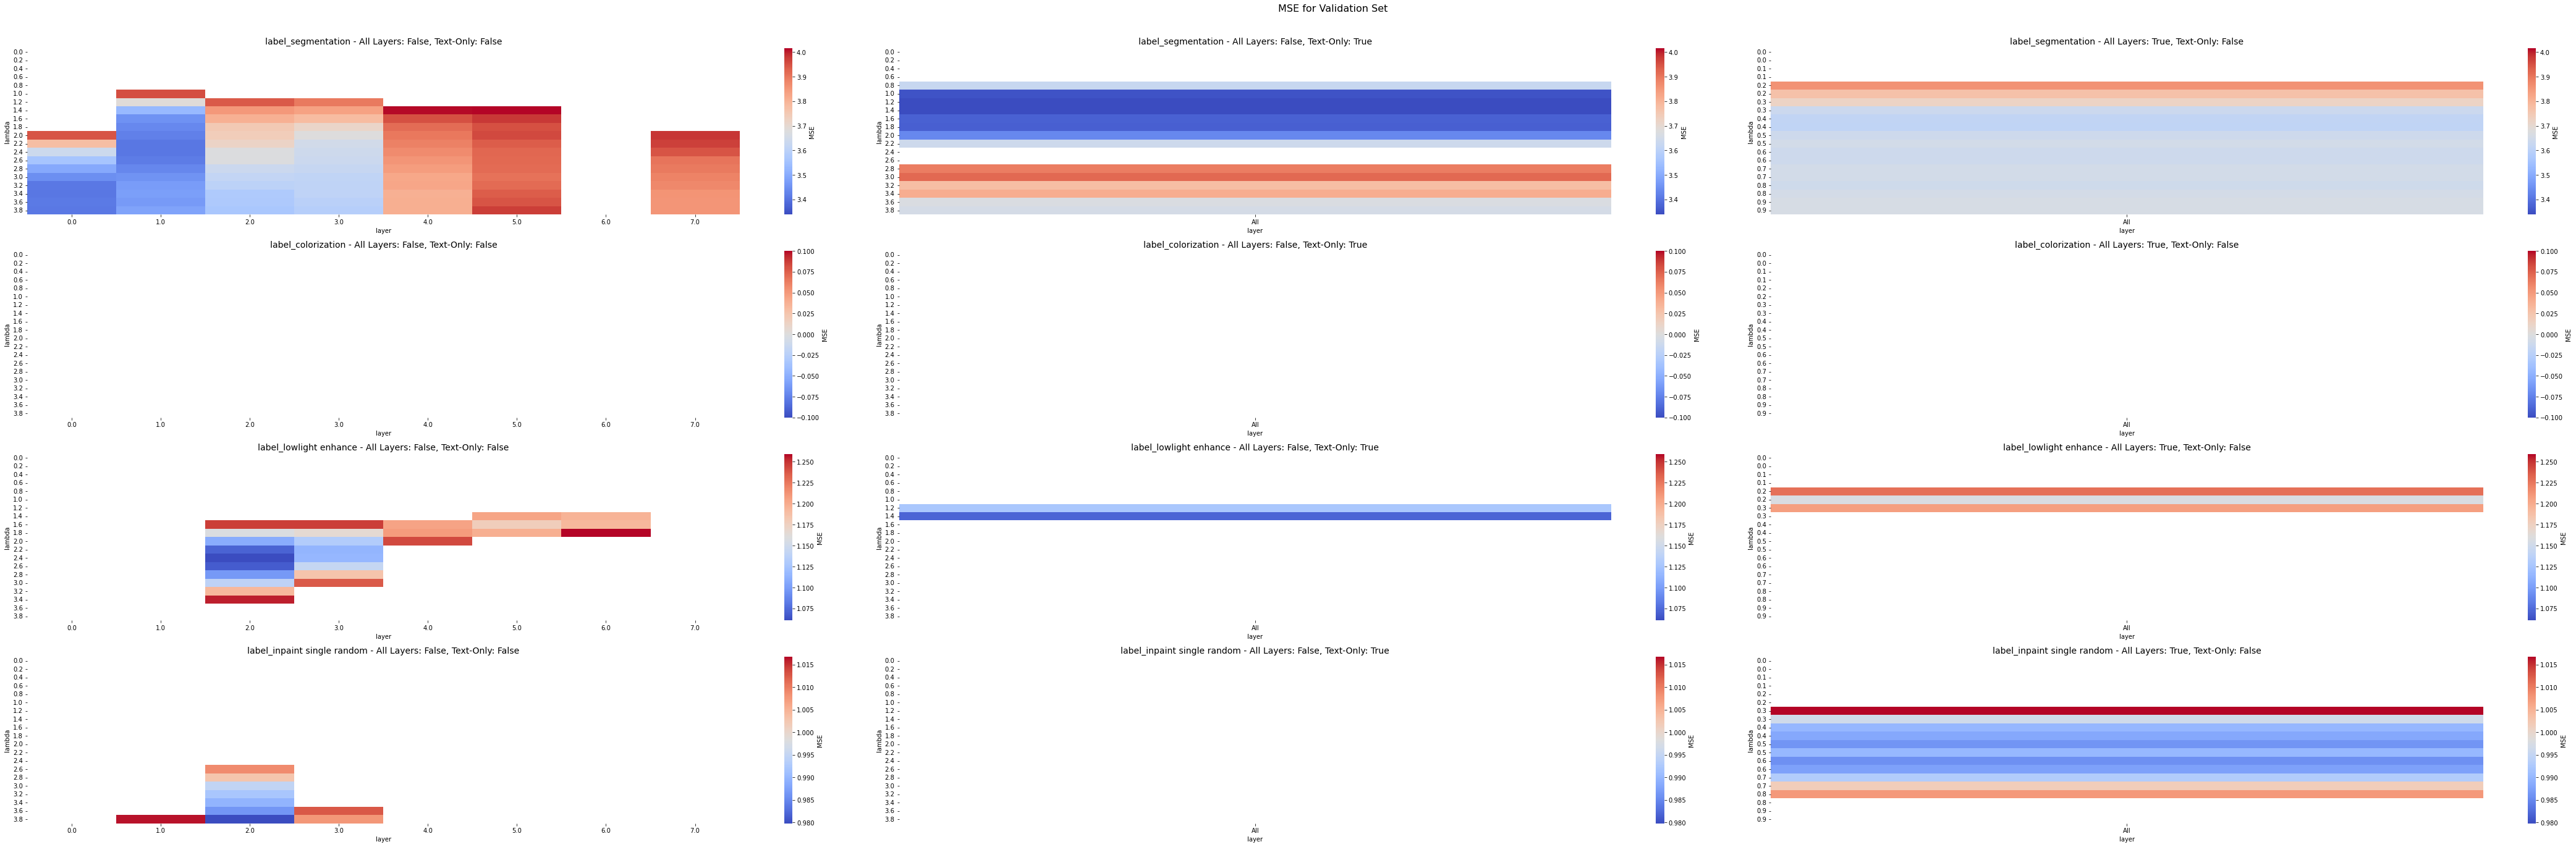

In [66]:
unique_tasks = ['label_segmentation', 'label_colorization', 'label_lowlight enhance', 'label_inpaint single random']
# Setting up the grid for plotting - assuming there are 3 unique tasks
num_rows = 4
num_cols = 3  # Changed to 3 columns to accommodate the new pivot tables
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 20))  # Adjusted for more space and additional column

# Iterating over each task and creating a heatmap
for i, task in enumerate(unique_tasks):
    df_task = df[df['task'] == task]
    df_baseline = df_task[df_task['lambda'].isna()]

    # Creating pivot tables for the specified conditions
    pivot_table_all_layers_false_textonly_false = df_task[(df_task['all_layers'] == False) & (df_task['text_only'] == False)].pivot_table(index='lambda', columns='layer', values='metric')
    pivot_table_all_layers_false_textonly_true = df_task[(df_task['all_layers'] == False) & (df_task['text_only'] == True)].pivot_table(index='lambda', columns='layer', values='metric')
    pivot_table_all_layers_true_textonly_false = df_task[(df_task['all_layers'] == True) & (df_task['text_only'] == False)].pivot_table(index='lambda', columns='layer', values='metric')

    # Get the baseline metric for the task
    baseline_metric = df_baseline["metric"].mean()

    # Set cells with worse performance than the baseline to NaN
    pivot_table_all_layers_false_textonly_false = pivot_table_all_layers_false_textonly_false.mask(pivot_table_all_layers_false_textonly_false > baseline_metric)
    pivot_table_all_layers_false_textonly_true = pivot_table_all_layers_false_textonly_true.mask(pivot_table_all_layers_false_textonly_true > baseline_metric)
    pivot_table_all_layers_true_textonly_false = pivot_table_all_layers_true_textonly_false.mask(pivot_table_all_layers_true_textonly_false > baseline_metric)

    # Get the minimum and maximum metric values across all pivot tables for consistent colorscale
    vmin = min(pivot_table_all_layers_false_textonly_false.min().min(), pivot_table_all_layers_false_textonly_true.min().min(), pivot_table_all_layers_true_textonly_false.min().min())
    vmax = max(pivot_table_all_layers_false_textonly_false.max().max(), pivot_table_all_layers_false_textonly_true.max().max(), pivot_table_all_layers_true_textonly_false.max().max())

    # Plotting the heatmaps
    sns.heatmap(pivot_table_all_layers_false_textonly_false, ax=axes[i, 0], cmap='coolwarm', cbar_kws={'label': 'MSE'}, vmin=vmin, vmax=vmax)
    sns.heatmap(pivot_table_all_layers_false_textonly_true, ax=axes[i, 1], cmap='coolwarm', cbar_kws={'label': 'MSE'}, vmin=vmin, vmax=vmax)
    sns.heatmap(pivot_table_all_layers_true_textonly_false, ax=axes[i, 2], cmap='coolwarm', cbar_kws={'label': 'MSE'}, vmin=vmin, vmax=vmax)

    axes[i, 0].set_title(f"{task} - All Layers: False, Text-Only: False", fontsize=14)
    axes[i, 1].set_title(f"{task} - All Layers: False, Text-Only: True", fontsize=14)
    axes[i, 2].set_title(f"{task} - All Layers: True, Text-Only: False", fontsize=14)

    # Adjust y-axis labels to show only first 3 significant figures in lambda
    for col in range(num_cols):
        y_labels = axes[i, col].get_yticklabels()
        axes[i, col].set_yticklabels([label.get_text()[:3] for label in y_labels])

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("MSE for Validation Set", fontsize=16)
plt.show()


In [59]:
df['task'].unique()


array(['label_segmentation', 'label_colorization',
       'label_lowlight enhance', 'label_inpaint single random'],
      dtype=object)

In [84]:
df_grouped = df.groupby(["task", "layer", "lambda_1", "lambda_2", "text_coeff"])["metric"].mean().reset_index()

baseline = df_grouped[df_grouped["layer"]==False]
baseline_no_injection = df_grouped[(df_grouped["lambda_1"]==0)&(df_grouped["lambda_2"]==0)&(df_grouped["layer"]!=False)]
unique_tasks = df_grouped['task'].unique()


In [97]:
baseline

,task,layer,lambda_1,lambda_2,text_coeff,metric
0,label_colorization,False,0.0,0.0,0.0,0.956829
721,label_inpaint single random,False,0.0,0.0,0.0,1.015093
1442,label_lowlight enhance,False,0.0,0.0,0.0,1.249791
2163,label_segmentation,False,0.0,0.0,0.0,4.108138


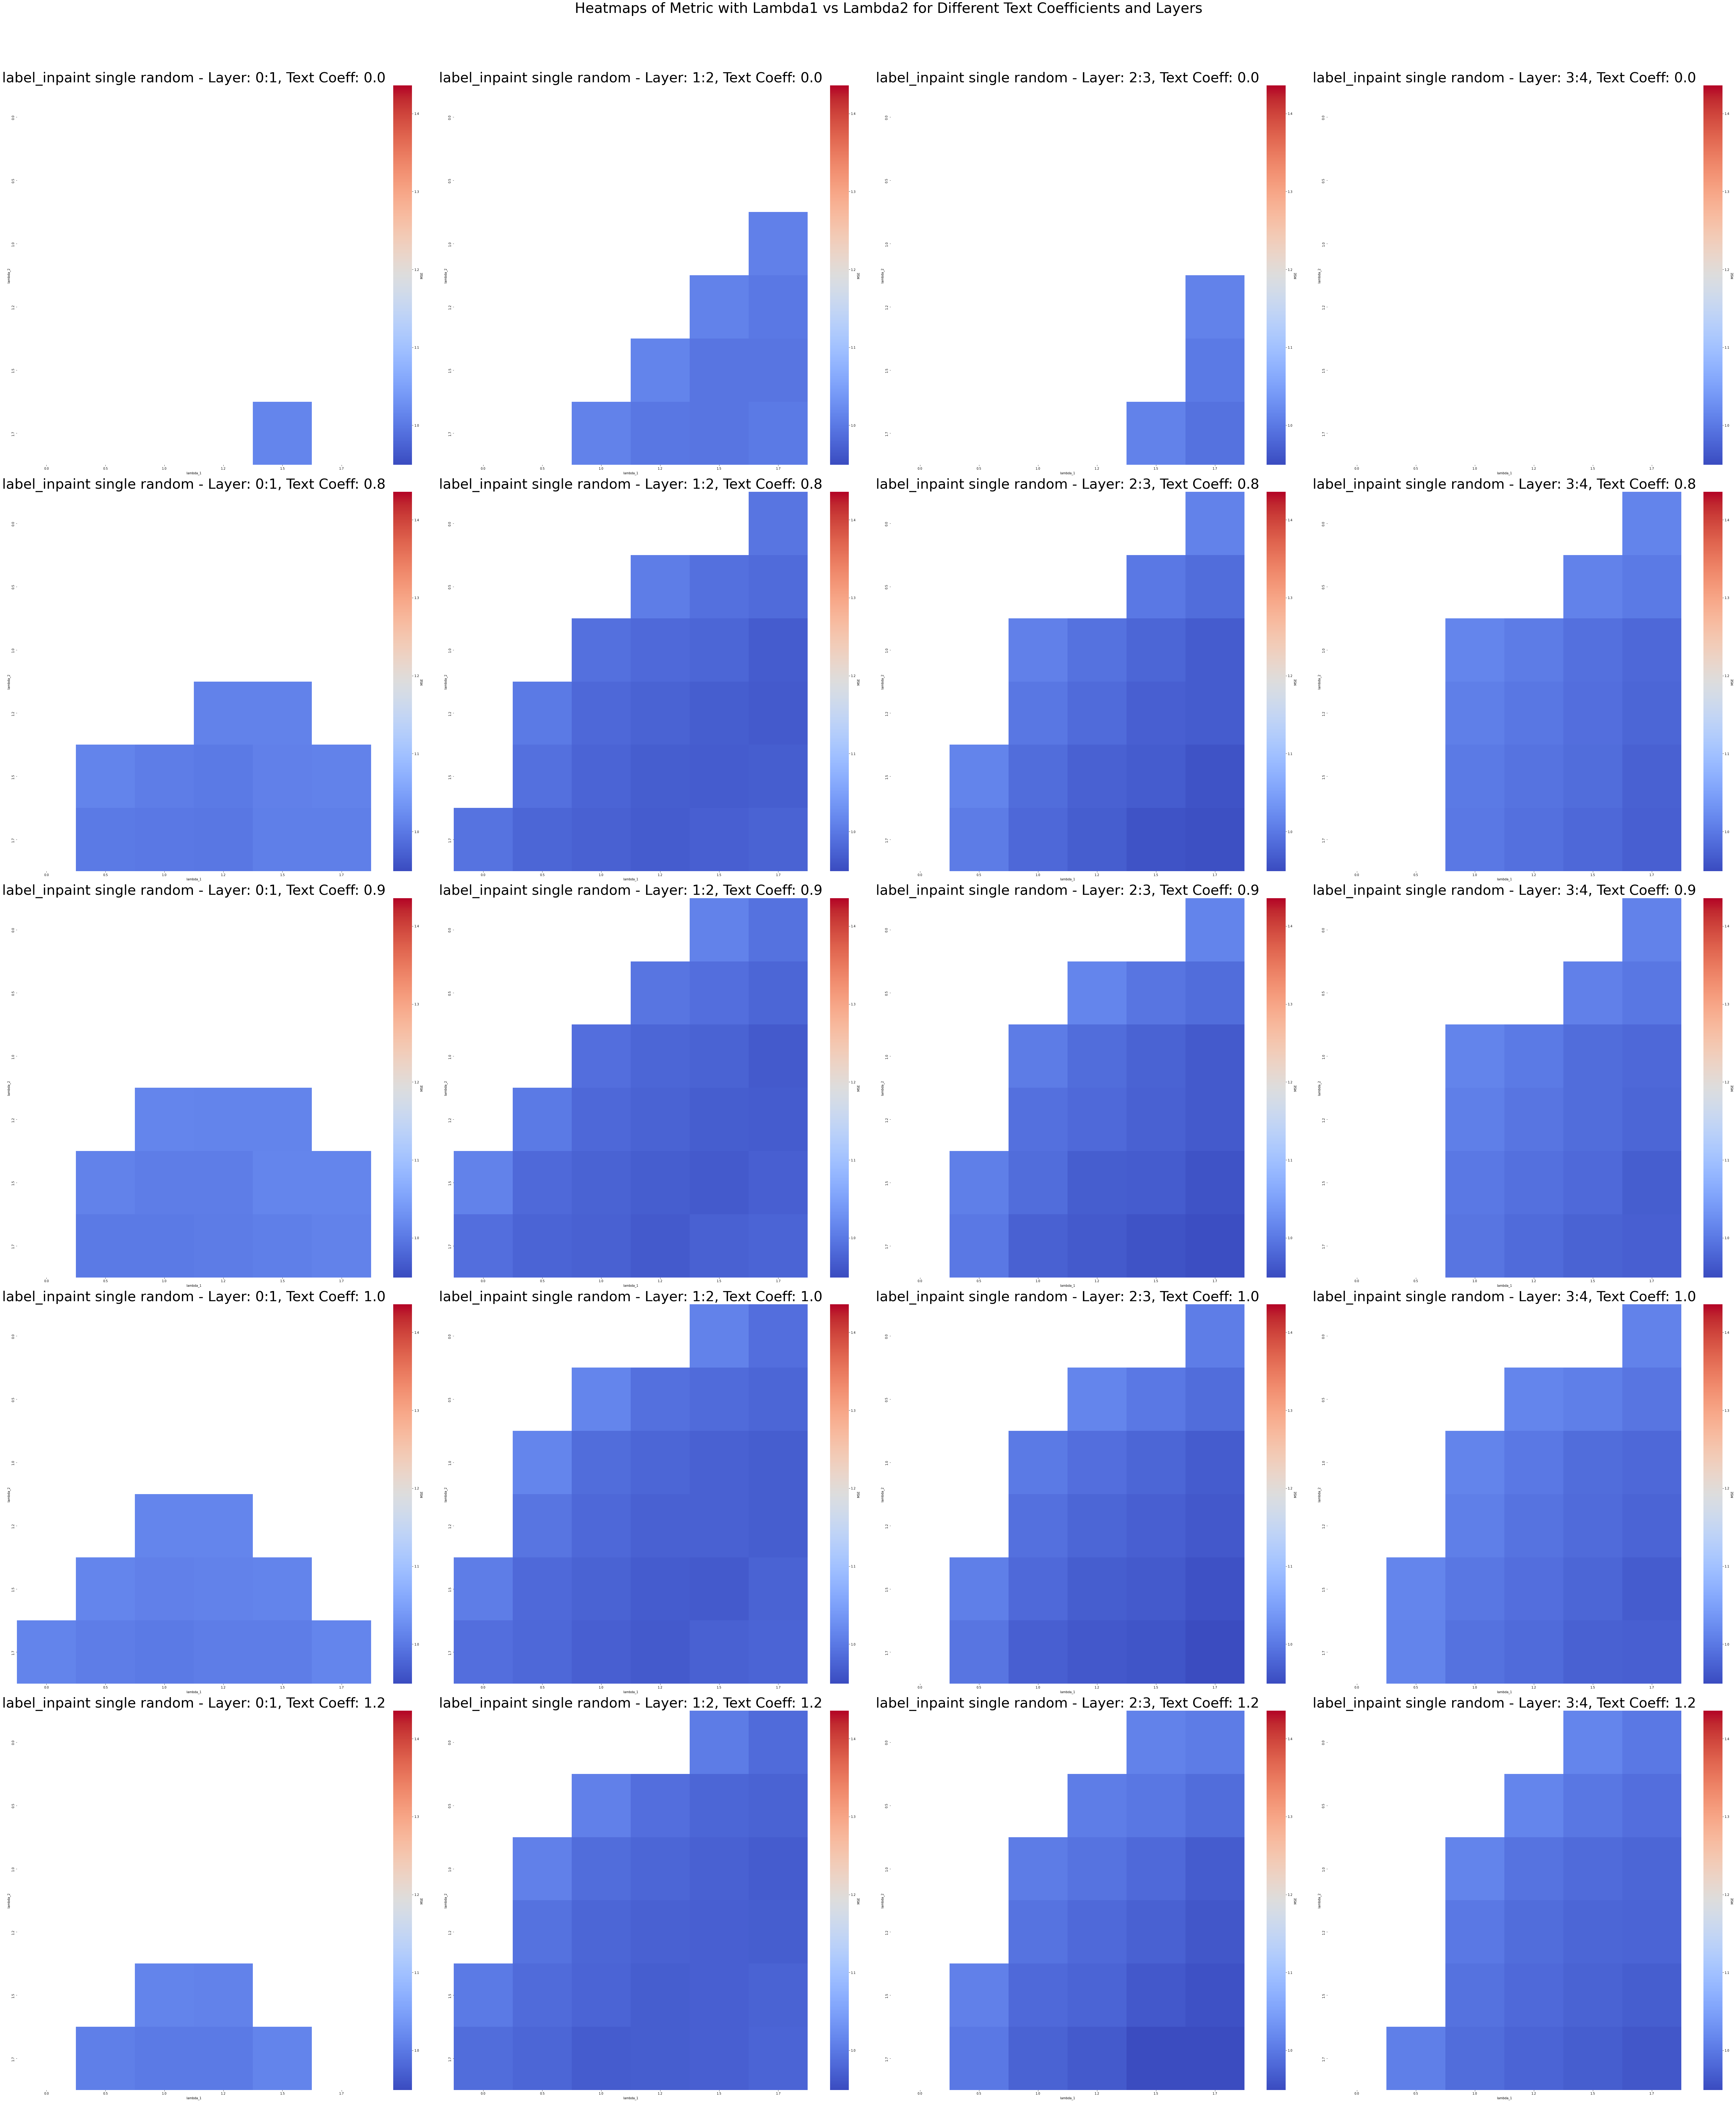

In [108]:
task = 'label_inpaint single random'
task_df_grouped = df_grouped[df_grouped['task'] == task]

layers = sorted(df_grouped[df_grouped['layer'] != False]['layer'].unique(), key=lambda x: int(x[0]))
text_coeffs = df_grouped[df_grouped['layer'] != False]['text_coeff'].unique()

num_rows = len(text_coeffs)
num_cols = len(layers)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20 * num_cols, 20 * num_rows))  # Adjusted for more space and dynamic grid size

vmin, vmax = float('inf'), float('-inf')

# Calculate vmin and vmax across all heatmaps
vmin = min(vmin, task_df_grouped["metric"].min())
vmax = max(vmax, task_df_grouped["metric"].max())

# Iterating over each text_coeff and layer to create a heatmap
for i, text_coeff in enumerate(text_coeffs):
    for j, layer in enumerate(layers):
        df_task_layer = task_df_grouped[(task_df_grouped['text_coeff'] == text_coeff) & (task_df_grouped['layer'] == layer)]
        
        # Creating pivot tables for the specified conditions
        pivot_table = df_task_layer.pivot_table(index='lambda_2', columns='lambda_1', values='metric')

        baseline_metric = baseline[baseline["task"]==task]["metric"].mean()

        pivot_table = pivot_table.mask(pivot_table > baseline_metric)

        sns.heatmap(pivot_table, ax=axes[i, j], cmap='coolwarm', cbar_kws={'label': 'MSE'}, mask=pivot_table.isnull(), vmin=vmin, vmax=vmax)


        axes[i, j].set_title(f"{task} - Layer: {layer}, Text Coeff: {text_coeff}", fontsize=45)

        # Adjust y-axis labels to show only first 3 significant figures in lambda_2
        y_labels = axes[i, j].get_yticklabels()
        axes[i, j].set_yticklabels([label.get_text()[:3] for label in y_labels])

        # Adjust x-axis labels to show only first 3 significant figures in lambda_1
        x_labels = axes[i, j].get_xticklabels()
        axes[i, j].set_xticklabels([label.get_text()[:3] for label in x_labels])

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("Heatmaps of Metric with Lambda1 vs Lambda2 for Different Text Coefficients and Layers", fontsize=46)
plt.show()
